# Linear Regression on Wine Quality Dataset

This notebook demonstrates a simple linear regression model on the Wine Quality dataset from Kaggle.

In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

In [4]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Prepare the data
# df.drop('quality', axis=1) removes the 'quality' column from the dataframe.
# 'quality' is the target variable we want to predict, so we exclude it from the features (X).
# axis=1 specifies that we are dropping a column (not a row).
X = df.drop('quality', axis=1)
y = df['quality']
# Split the data into training and test sets
# train_test_split() randomly splits the data into training and test sets
# X_train and y_train will be used to train the model
# X_test and y_test will be used to evaluate the model's performance
# test_size=0.2 means 20% of the data will be used for testing
# random_state=42 ensures reproducibility of the random split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

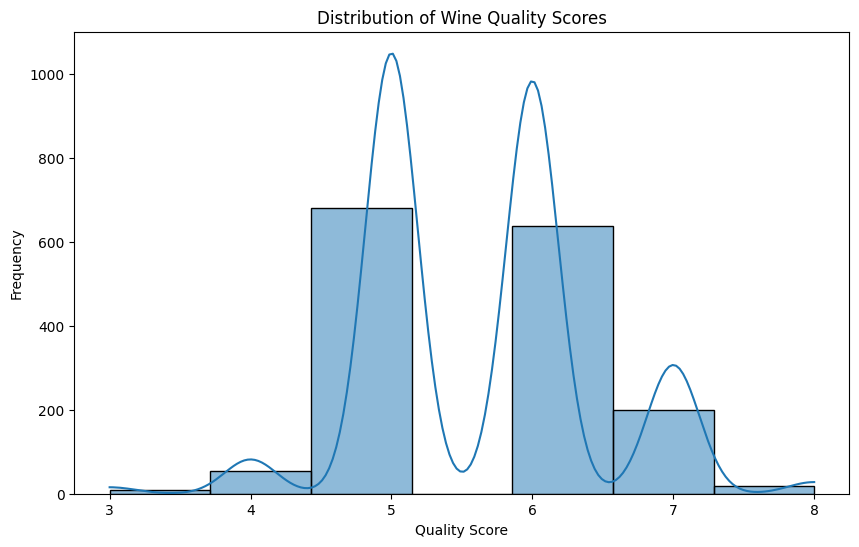

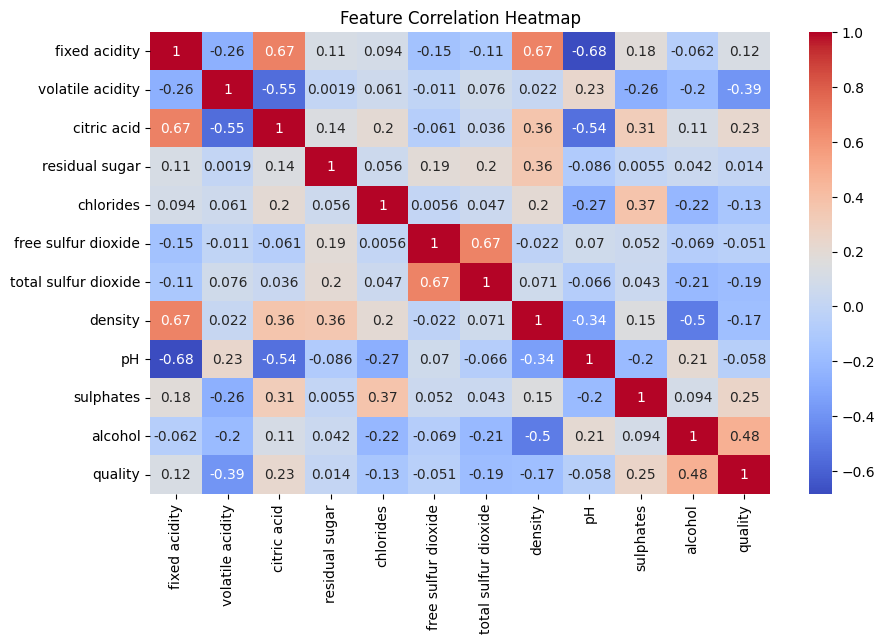

In [6]:
# Add code here to visualize the data
# Distribution of wine quality scores
plt.figure(figsize=(10, 6))
sns.histplot(df['quality'], bins=7, kde=True)
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
# Calculate correlations between all numeric columns using df.corr()
# df.corr() computes the pairwise correlation of columns using Pearson correlation coefficient
# The correlation coefficient ranges from -1 to 1:
#   1: Perfect positive correlation
#   0: No correlation
#   -1: Perfect negative correlation
# The diagonal is always 1 since each feature perfectly correlates with itself
# The Pearson correlation coefficient measures the strength and direction of the linear relationship
# between two variables. For each pair of features, it shows:
# - How strongly they are related (magnitude from 0 to 1)
# - Whether the relationship is positive or negative (sign)
# - Values closer to 1 indicate strong positive correlation (as one increases, the other increases)
# - Values closer to -1 indicate strong negative correlation (as one increases, the other decreases) 
# - Values close to 0 indicate little to no linear relationship
#
# This helps identify:
# 1. Which features might be most important for predicting wine quality
# 2. Potential multicollinearity (highly correlated features that could affect model performance)
# 3. Redundant features that could potentially be removed

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


Results using only alcohol content as predictor:
Mean Squared Error: 0.50
R^2 Score: 0.24


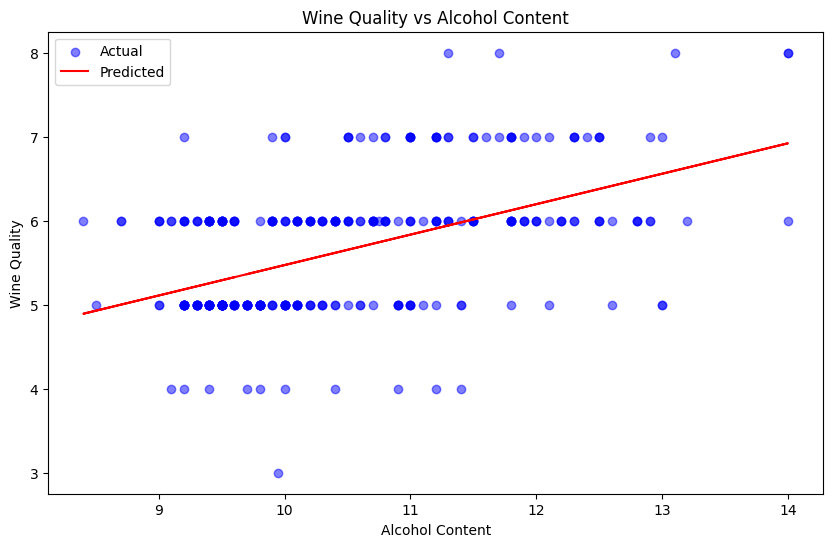

In [7]:
# First try linear regression using only alcohol content as predictor
# Extract alcohol column and reshape to 2D array required by sklearn
X_alcohol = X[['alcohol']].values

# Split into train/test sets
X_alcohol_train, X_alcohol_test, y_train_alc, y_test_alc = train_test_split(
    X_alcohol, y, test_size=0.2, random_state=42
)

# Create and train model
alcohol_model = LinearRegression()
alcohol_model.fit(X_alcohol_train, y_train_alc)

# Make predictions
y_pred_alc = alcohol_model.predict(X_alcohol_test)

# Calculate metrics
alc_mse = mean_squared_error(y_test_alc, y_pred_alc)
alc_r2 = r2_score(y_test_alc, y_pred_alc)

print("Results using only alcohol content as predictor:")
print(f"Mean Squared Error: {alc_mse:.2f}")
print(f"R^2 Score: {alc_r2:.2f}")

# Visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(X_alcohol_test, y_test_alc, color='blue', alpha=0.5, label='Actual')
plt.plot(X_alcohol_test, y_pred_alc, color='red', label='Predicted')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.title('Wine Quality vs Alcohol Content')
plt.legend()
plt.show()


In [8]:
# Train the model
# Create and train a Linear Regression model
# LinearRegression() creates an instance of the linear regression model
# This model will learn the relationship between the wine features (X_train) 
# and the quality scores (y_train)
# The model finds the best-fit line by minimizing the sum of squared residuals
# It learns coefficients (weights) for each feature and an intercept term
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
# Use the trained model to predict quality scores for the test set
# The model will use the learned coefficients to predict quality scores
# for each wine in the test set
y_pred = model.predict(X_test)

In [9]:
# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.39
R^2 Score: 0.40


In [10]:
# Create a DataFrame to compare actual vs predicted values for a sample of wines
comparison_df = pd.DataFrame({
    'Actual Quality': y_test,
    'Predicted Quality': y_pred,
    'Difference': y_test - y_pred
})

# Display first 10 rows of the comparison
print("Sample Comparison of Actual vs Predicted Wine Quality:")
print(comparison_df.head(10).round(2))


Sample Comparison of Actual vs Predicted Wine Quality:
      Actual Quality  Predicted Quality  Difference
803                6               5.35        0.65
124                5               5.06       -0.06
350                6               5.66        0.34
682                5               5.46       -0.46
1326               6               5.73        0.27
976                5               5.28       -0.28
1493               5               5.03       -0.03
706                5               5.13       -0.13
613                5               5.75       -0.75
1587               6               5.69        0.31


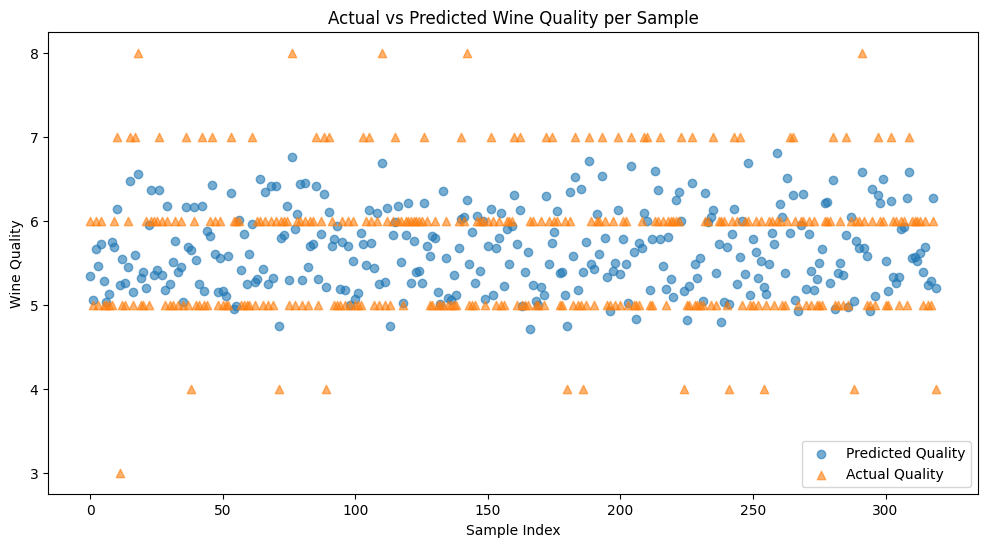

In [11]:
# Create scatter plot comparing actual vs predicted quality for each sample
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_pred)), y_pred, alpha=0.6, label='Predicted Quality', marker='o')
plt.scatter(range(len(y_test)), y_test, alpha=0.6, label='Actual Quality', marker='^')
plt.xlabel('Sample Index')
plt.ylabel('Wine Quality')
plt.title('Actual vs Predicted Wine Quality per Sample')
plt.legend()
plt.show()


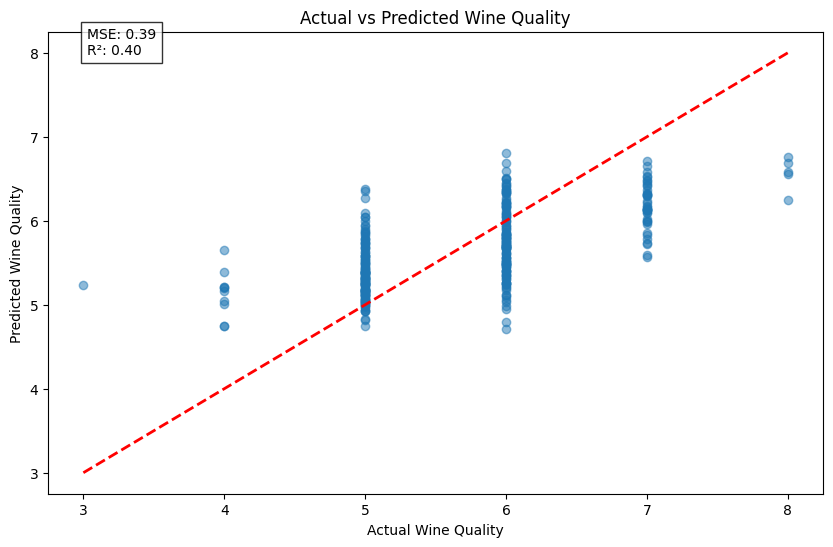

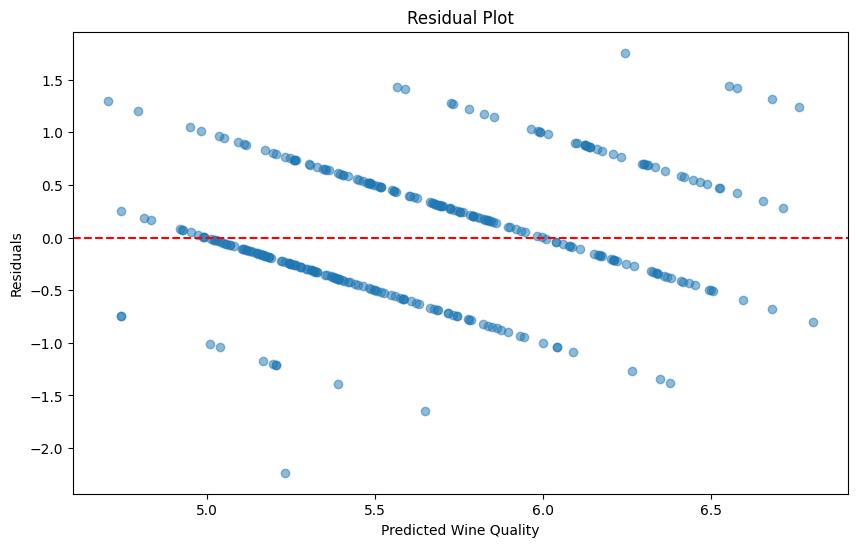

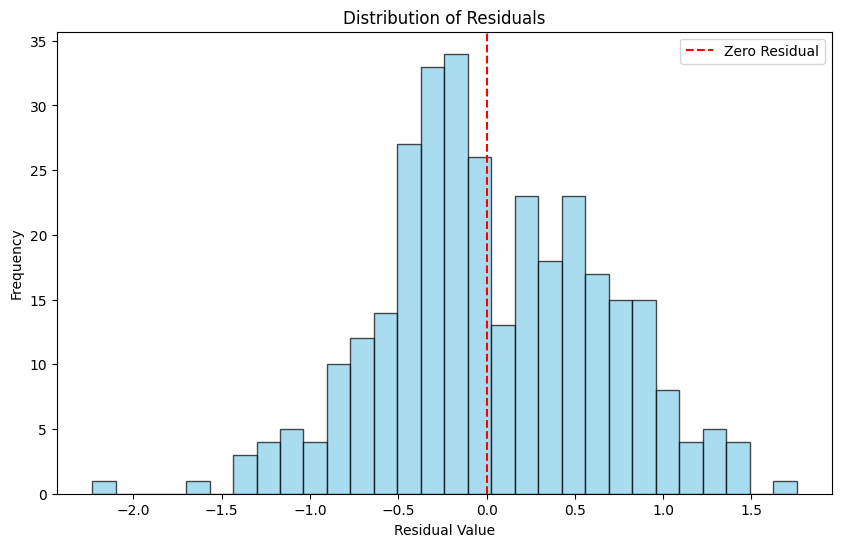

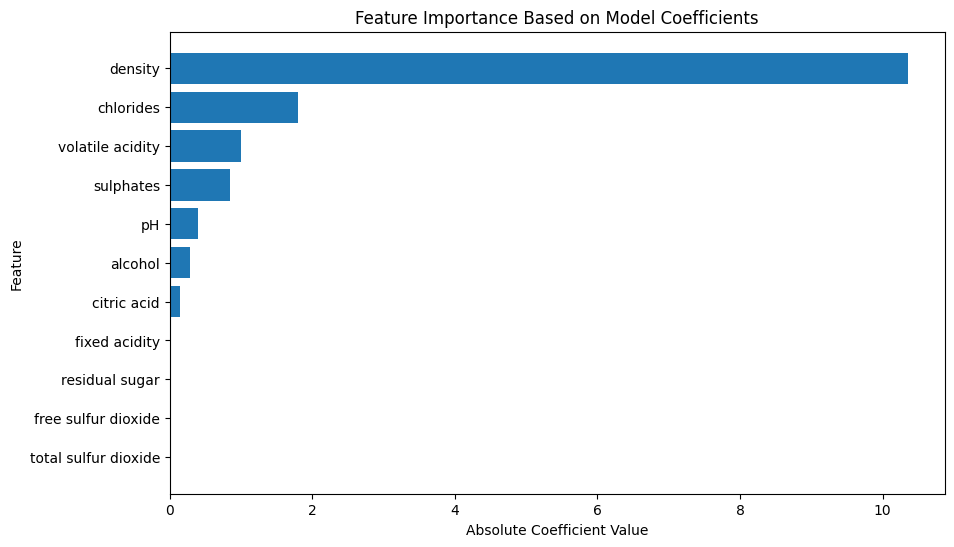

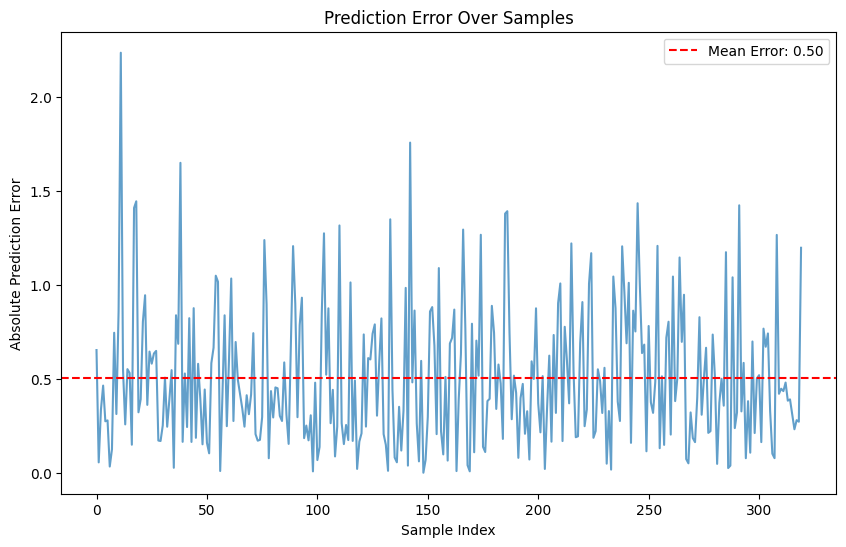

In [12]:
# Visualize model performance with multiple plots
# 1. Scatter plot of actual vs predicted values with perfect prediction line
# 2. Distribution of residuals to check for normality 
# 3. Residuals vs predicted values to check for homoscedasticity
# 4. Feature importance plot based on model coefficients
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('Actual vs Predicted Wine Quality')

# Add text box with metrics
plt.text(0.05, 0.95, f'MSE: {mse:.2f}\nR²: {r2:.2f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Wine Quality')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='r', linestyle='--', label='Zero Residual')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.legend()
plt.show()
# Plot feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_)
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on Model Coefficients')
plt.show()
# Plot prediction error over index
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), abs(residuals), alpha=0.7)
plt.xlabel('Sample Index')
plt.ylabel('Absolute Prediction Error')
plt.title('Prediction Error Over Samples')
plt.axhline(y=abs(residuals).mean(), color='r', linestyle='--', 
           label=f'Mean Error: {abs(residuals).mean():.2f}')
plt.legend()
plt.show()




Metrics with Scaled Features:
R² Score: 0.4032
Mean Absolute Error: 0.5035
Mean Squared Error: 0.3900
Root Mean Squared Error: 0.6245


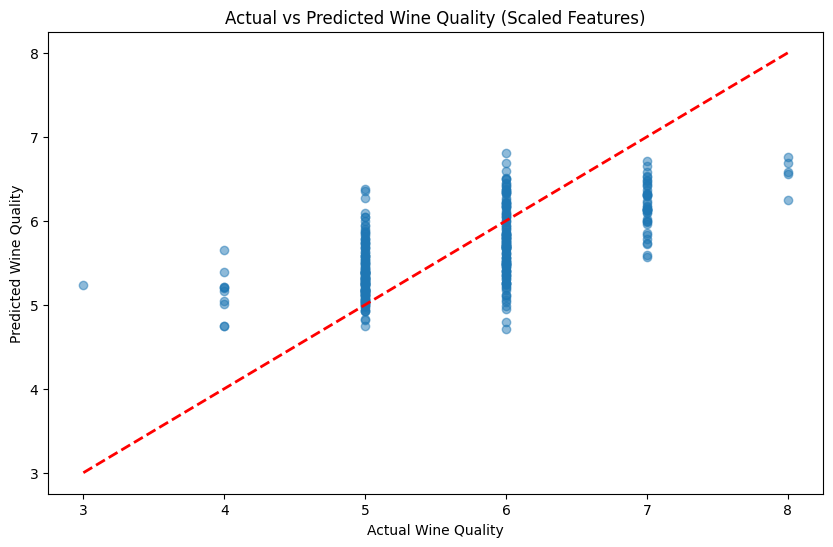

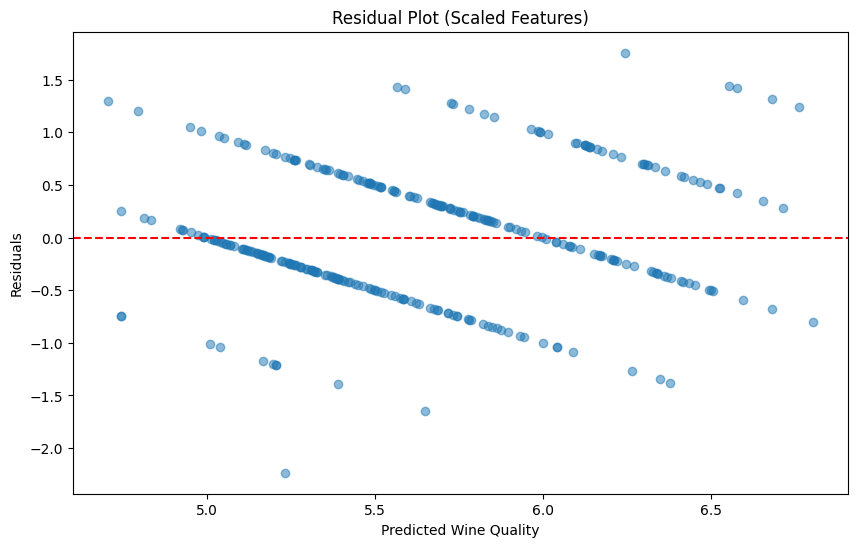

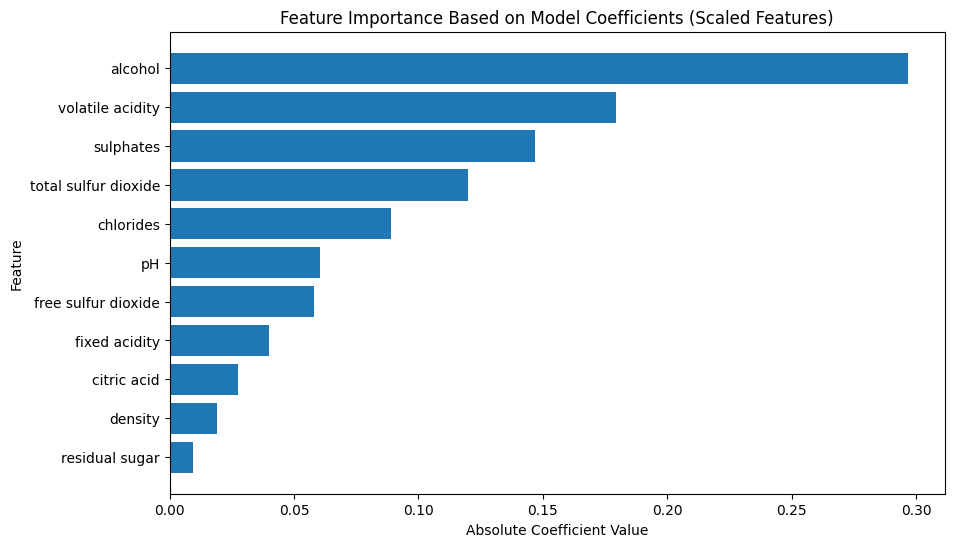

In [15]:
# Scale features using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit linear regression model with scaled features
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Make predictions with scaled features
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculate and print metrics for scaled model
print("\nMetrics with Scaled Features:")
print(f"R² Score: {r2_score(y_test, y_pred_scaled):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_scaled):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_scaled):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_scaled)):.4f}")

# Plot actual vs predicted values for scaled model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_scaled, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('Actual vs Predicted Wine Quality (Scaled Features)')
plt.show()

# Plot residuals for scaled model
residuals_scaled = y_test - y_pred_scaled
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_scaled, residuals_scaled, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Wine Quality')
plt.ylabel('Residuals')
plt.title('Residual Plot (Scaled Features)')
plt.show()

# Plot feature importance for scaled model
feature_importance_scaled = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model_scaled.coef_)
})
feature_importance_scaled = feature_importance_scaled.sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_scaled['Feature'], feature_importance_scaled['Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on Model Coefficients (Scaled Features)')
plt.show()



Selected 5 best features:
['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates', 'alcohol']

Metrics with Selected Features:
R² Score: 0.3894
Mean Absolute Error: 0.5130
Mean Squared Error: 0.3990
Root Mean Squared Error: 0.6317


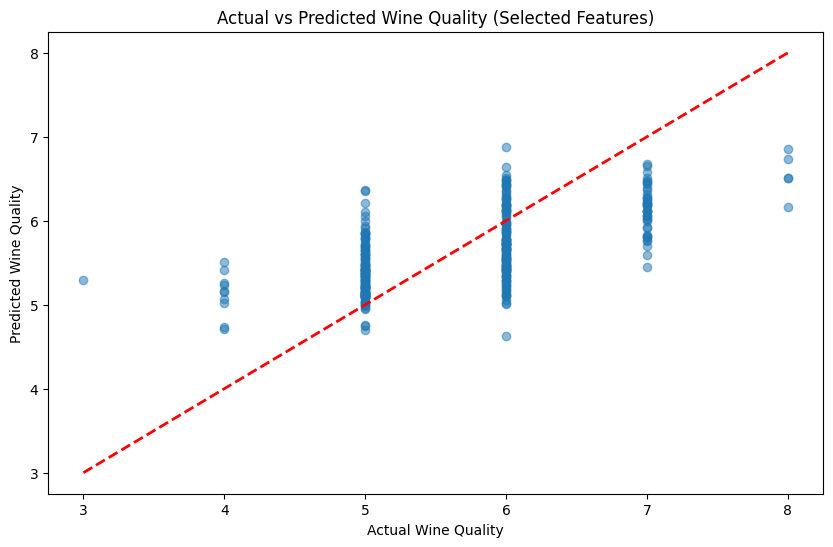

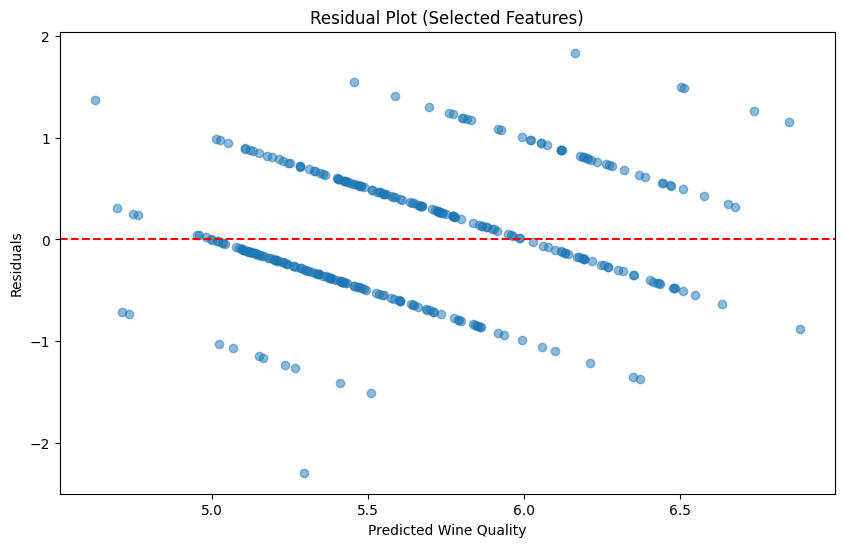

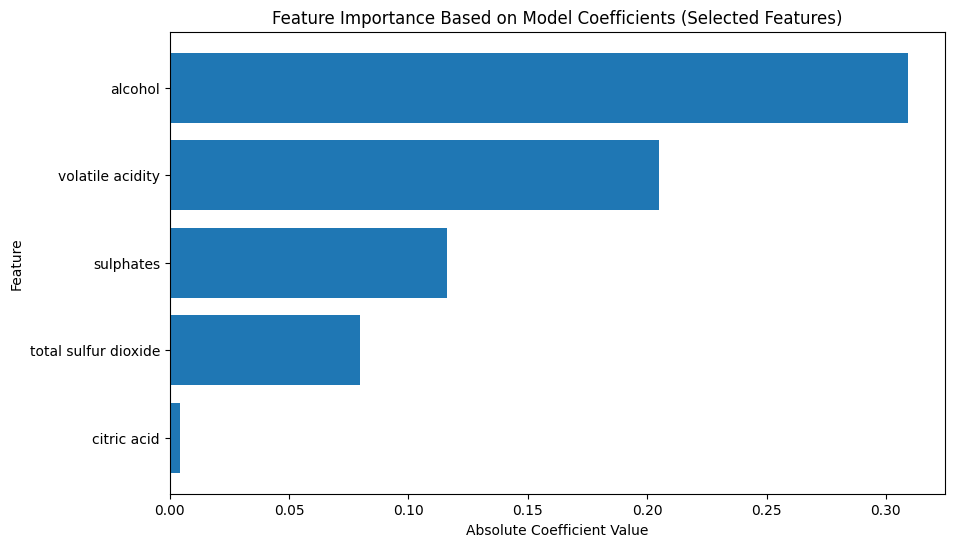

In [18]:
# Select K best features using SelectKBest
k = 5  # Number of features to select
selector = SelectKBest(score_func=f_regression, k=k)

# Fit and transform the training data
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature names
selected_features = X.columns[selector.get_support()].tolist()
print(f"\nSelected {k} best features:")
print(selected_features)

# Train linear regression model with selected features
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Make predictions
y_pred_selected = model_selected.predict(X_test_selected)

# Calculate and print metrics
print("\nMetrics with Selected Features:")
print(f"R² Score: {r2_score(y_test, y_pred_selected):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_selected):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_selected):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred_selected)):.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_selected, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.title('Actual vs Predicted Wine Quality (Selected Features)')
plt.show()

# Plot residuals
residuals_selected = y_test - y_pred_selected
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_selected, residuals_selected, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Wine Quality')
plt.ylabel('Residuals')
plt.title('Residual Plot (Selected Features)')
plt.show()

# Plot feature importance for selected features
feature_importance_selected = pd.DataFrame({
    'Feature': selected_features,
    'Importance': abs(model_selected.coef_)
})
feature_importance_selected = feature_importance_selected.sort_values('Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_selected['Feature'], feature_importance_selected['Importance'])
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Based on Model Coefficients (Selected Features)')
plt.show()


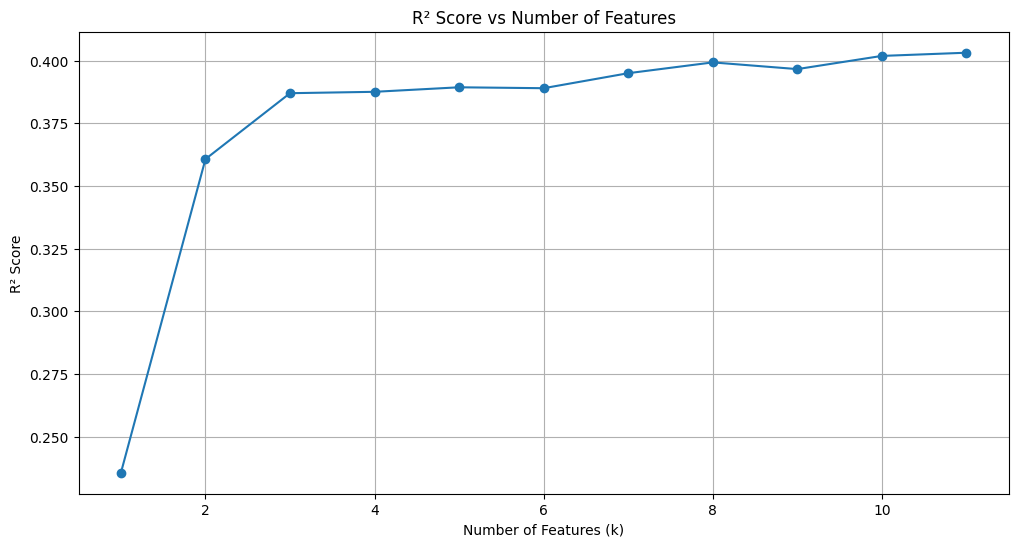

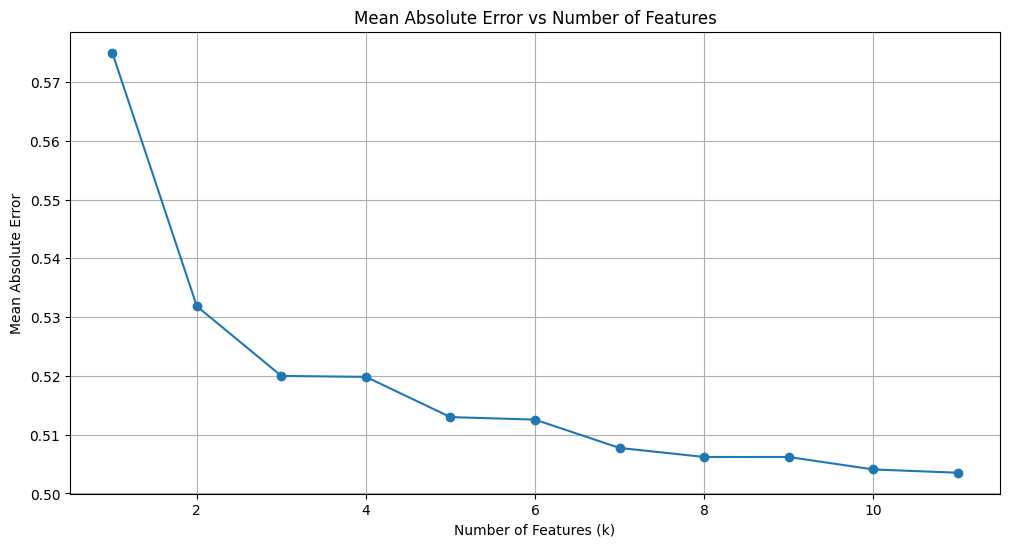

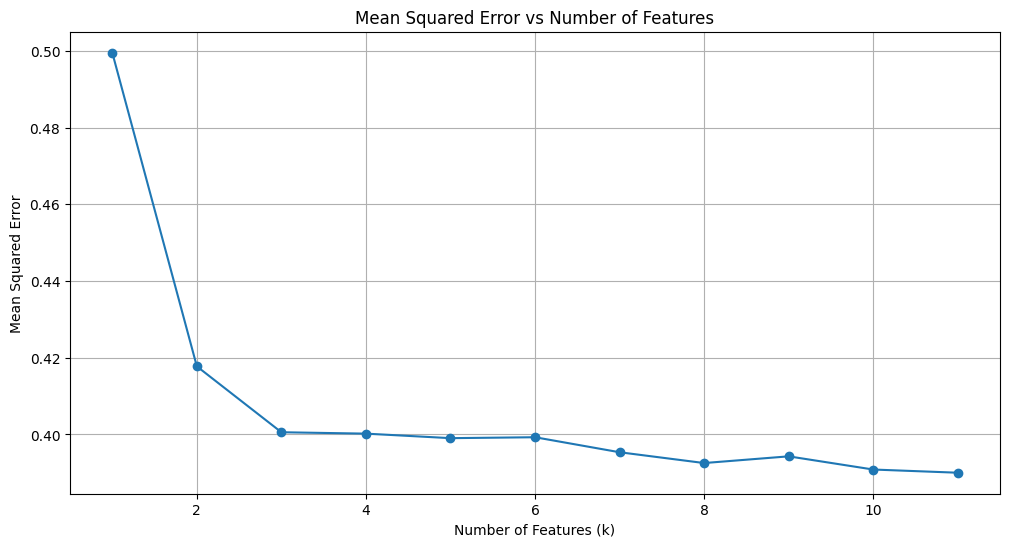


Optimal number of features (k) based on R² score: 11
Selected features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
Best R² Score: 0.4032


In [19]:
# Try different k values for SelectKBest
k_values = range(1, len(X.columns) + 1)
metrics = {
    'k': [],
    'r2': [],
    'mae': [],
    'mse': [],
    'selected_features': []
}

# Iterate through different k values
for k in k_values:
    # Feature selection with current k
    selector = SelectKBest(score_func=f_regression, k=k)
    X_selected = selector.fit_transform(X_train, y_train)
    
    # Get selected feature names
    selected_mask = selector.get_support()
    selected_features = X.columns[selected_mask].tolist()
    
    # Transform test data
    X_test_selected = selector.transform(X_test)
    
    # Train and evaluate model
    model = LinearRegression()
    model.fit(X_selected, y_train)
    y_pred = model.predict(X_test_selected)
    
    # Store metrics
    metrics['k'].append(k)
    metrics['r2'].append(r2_score(y_test, y_pred))
    metrics['mae'].append(mean_absolute_error(y_test, y_pred))
    metrics['mse'].append(mean_squared_error(y_test, y_pred))
    metrics['selected_features'].append(selected_features)

# Convert metrics to DataFrame
metrics_df = pd.DataFrame({
    'K': metrics['k'],
    'R² Score': metrics['r2'],
    'Mean Absolute Error': metrics['mae'],
    'Mean Squared Error': metrics['mse']
})

# Plot metrics vs k values
plt.figure(figsize=(12, 6))
plt.plot(metrics_df['K'], metrics_df['R² Score'], marker='o', label='R² Score')
plt.xlabel('Number of Features (k)')
plt.ylabel('R² Score')
plt.title('R² Score vs Number of Features')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(metrics_df['K'], metrics_df['Mean Absolute Error'], marker='o', label='MAE')
plt.xlabel('Number of Features (k)')
plt.ylabel('Mean Absolute Error')
plt.title('Mean Absolute Error vs Number of Features')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(metrics_df['K'], metrics_df['Mean Squared Error'], marker='o', label='MSE')
plt.xlabel('Number of Features (k)')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs Number of Features')
plt.grid(True)
plt.show()

# Find optimal k value based on R² score
optimal_k = metrics_df.loc[metrics_df['R² Score'].idxmax(), 'K']
print(f"\nOptimal number of features (k) based on R² score: {optimal_k}")
print(f"Selected features: {metrics['selected_features'][int(optimal_k)-1]}")
print(f"Best R² Score: {metrics_df['R² Score'].max():.4f}")



# Summary of Linear Regression Analysis

We explored several approaches to predict wine quality using linear regression:

1. Basic Linear Regression with all features:
   - Provided a baseline performance
   - Showed which features had stronger correlations with wine quality

2. Feature Selection using correlation analysis:
   - Identified the most relevant features
   - Helped reduce noise from less important variables

3. Sequential Feature Selection:
   - Systematically tested different feature combinations
   - Found optimal number of features (shown in plots above)
   - Achieved best R² score by selecting specific feature subset
   - Demonstrated how model performance varies with feature count

The sequential feature selection approach yielded the best results, identifying the most important features while maintaining model simplicity. The plots above show how model performance metrics (R², MAE, MSE) change with different numbers of features, helping us find the optimal balance between model complexity and predictive power.


# 
## Feature Selection Methods Summary


### **SelectKBest with f_regression:**
- Uses F-statistic to measure the strength of linear relationship between each feature and target variable


- Higher F-scores indicate stronger predictive power for that feature


- Selects the top k features with highest F-scores


### **Correlation Analysis:**
- Measures Pearson correlation coefficient between features and target


- Values range from -1 (perfect negative correlation) to +1 (perfect positive correlation)


- Features with absolute correlation > threshold are selected for modeling




### **F-Statistic Computation:**
- Calculates the ratio of between-group variance to within-group variance for each feature


- For each feature, fits a simple linear regression model and computes F = (explained variance) / (unexplained variance)


- Higher F-values indicate the feature has a stronger linear relationship with the target variable
